## <center> Forecasting Exchange Rates through Machine Learning and Econometric Models <br><br> - Utkarsh Barsaiyan</center>

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
df = pd.read_csv("USD_INR_weekly.csv")

In [5]:
df.head()

,Date,Price,Open,High,Low,Change %
0,"Nov 10, 2019",71.756,71.370,71.758,71.305,0.55%
1,"Nov 03, 2019",71.360,70.560,71.364,70.560,0.85%
2,"Oct 27, 2019",70.760,70.819,71.065,70.681,-0.08%
3,"Oct 20, 2019",70.820,71.080,71.090,70.720,-0.38%
4,"Oct 13, 2019",71.090,70.893,71.730,70.740,0.23%


In [6]:
df.tail()

,Date,Price,Open,High,Low,Change %
730,"Nov 13, 2005",45.725,45.685,45.850,45.515,0.37%
731,"Nov 06, 2005",45.555,45.505,46.045,45.365,0.19%
732,"Oct 30, 2005",45.470,45.000,45.567,44.980,0.94%
733,"Oct 23, 2005",45.045,45.035,45.255,44.935,0.01%
734,"Oct 16, 2005",45.040,44.740,45.435,44.730,0.55%


In [7]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%b %d, %Y')
df.index = df['Date']
df = df.sort_index(ascending=True, axis=0)

In [8]:
df.head()

,Date,Price,Open,High,Low,Change %
Date,,,,,,
2005-10-16,2005-10-16,45.040,44.740,45.435,44.730,0.55%
2005-10-23,2005-10-23,45.045,45.035,45.255,44.935,0.01%
2005-10-30,2005-10-30,45.470,45.000,45.567,44.980,0.94%
2005-11-06,2005-11-06,45.555,45.505,46.045,45.365,0.19%
2005-11-13,2005-11-13,45.725,45.685,45.850,45.515,0.37%


In [9]:
df.tail()

,Date,Price,Open,High,Low,Change %
Date,,,,,,
2019-10-13,2019-10-13,71.090,70.893,71.730,70.740,0.23%
2019-10-20,2019-10-20,70.820,71.080,71.090,70.720,-0.38%
2019-10-27,2019-10-27,70.760,70.819,71.065,70.681,-0.08%
2019-11-03,2019-11-03,71.360,70.560,71.364,70.560,0.85%
2019-11-10,2019-11-10,71.756,71.370,71.758,71.305,0.55%


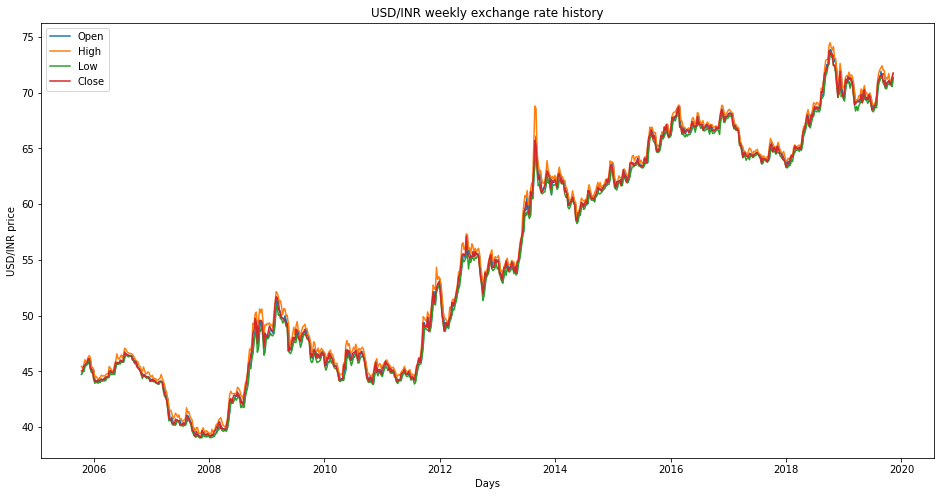

In [10]:
plt.figure(figsize=(16,8))
plt.plot(df["Open"])
plt.plot(df["High"])
plt.plot(df["Low"])
plt.plot(df["Price"])
plt.title('USD/INR weekly exchange rate history')
plt.ylabel('USD/INR price')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

In [11]:
print("checking if any null values are present\n", df.isna().sum())

checking if any null values are present
 Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64


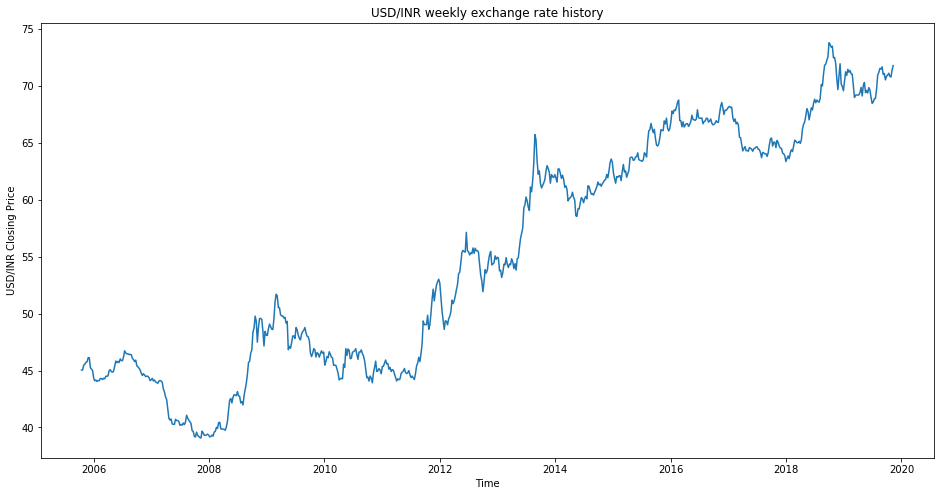

In [12]:
#plot
plt.figure(figsize=(16,8))
plt.title('USD/INR weekly exchange rate history')
plt.ylabel('USD/INR Closing Price')
plt.xlabel('Time')
plt.plot(df['Price'], label='Close Price history')

In [13]:
#split into 80% train and 20% test data
df_train = df[:588]
df_test = df[588:]

In [14]:
df_train

,Date,Price,Open,High,Low,Change %
Date,,,,,,
2005-10-16,2005-10-16,45.040,44.740,45.435,44.730,0.55%
2005-10-23,2005-10-23,45.045,45.035,45.255,44.935,0.01%
2005-10-30,2005-10-30,45.470,45.000,45.567,44.980,0.94%
2005-11-06,2005-11-06,45.555,45.505,46.045,45.365,0.19%
2005-11-13,2005-11-13,45.725,45.685,45.850,45.515,0.37%
...,...,...,...,...,...,...
2016-12-18,2016-12-18,67.837,67.850,68.111,67.708,-0.03%
2016-12-25,2016-12-25,67.955,67.841,68.261,67.705,0.17%
2017-01-01,2017-01-01,68.115,67.970,68.455,67.745,0.24%


In [15]:
df_test

,Date,Price,Open,High,Low,Change %
Date,,,,,,
2017-01-22,2017-01-22,68.105,68.096,68.255,67.980,0.04%
2017-01-29,2017-01-29,67.184,68.105,68.119,67.184,-1.35%
2017-02-05,2017-02-05,66.854,67.241,67.486,66.741,-0.49%
2017-02-12,2017-02-12,67.080,66.920,67.167,66.800,0.34%
2017-02-19,2017-02-19,66.645,67.085,67.085,66.615,-0.65%
...,...,...,...,...,...,...
2019-10-13,2019-10-13,71.090,70.893,71.730,70.740,0.23%
2019-10-20,2019-10-20,70.820,71.080,71.090,70.720,-0.38%
2019-10-27,2019-10-27,70.760,70.819,71.065,70.681,-0.08%


### Moving Average

In [16]:
preds = []
for i in range(0, df_test.shape[0]):
    a = df_train['Price'][i:].sum() + sum(preds)
    b = a/len(df_train)
    preds.append(b)

In [17]:
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(df_test['Price'])-preds),2)))
print('RMSE value on validation set:')
print(rms)

RMSE value on validation set:
14.70099224922269


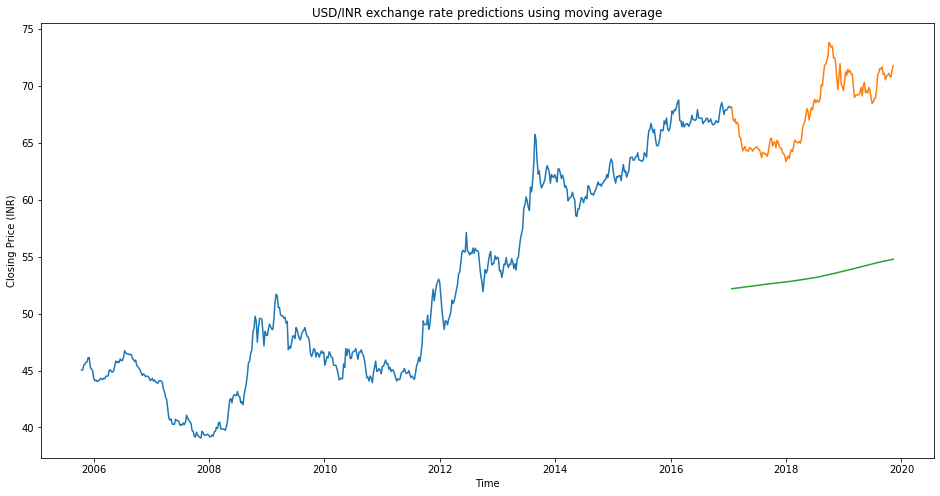

In [18]:
#plot
plt.figure(figsize=(16,8))
plt.title('USD/INR exchange rate predictions using moving average')
plt.ylabel('Closing Price (INR)')
plt.xlabel('Time')
df_test = df_test.assign(Predictions = 0)
df_test = df_test.assign(Predictions = preds)
plt.plot(df_train['Price'])
plt.plot(df_test[['Price', 'Predictions']])

### Seasonal ARIMA

In [16]:
from pmdarima.arima import auto_arima

training = df_train['Price']
validation = df_test['Price']

model = auto_arima(training, start_p=1, start_q=1, max_p=1, max_q=1, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=len(validation))
forecast = pd.DataFrame(forecast,index = df_test.index,columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=969.002, BIC=990.774, Fit time=4.880 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1341.240, BIC=1349.948, Fit time=0.211 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1156.952, BIC=1174.369, Fit time=1.307 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=968.501, BIC=985.919, Fit time=4.392 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=969.921, BIC=991.692, Fit time=5.026 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1340.635, BIC=1353.698, Fit time=0.148 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=969.957, BIC=991.729, Fit time=16.055 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=971.709, BIC=997.835, Fit time=18.861 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=971.527, BIC=984.590, Fit time=2.828 seconds
Total fit time: 53.713 seconds


In [17]:
#rms
rms=np.sqrt(np.mean(np.power((np.array(df_test['Price'])-np.array(forecast['Prediction'])),2)))
print('RMSE value on validation set:')
print(rms)

RMSE value on validation set:
7.16694442349267


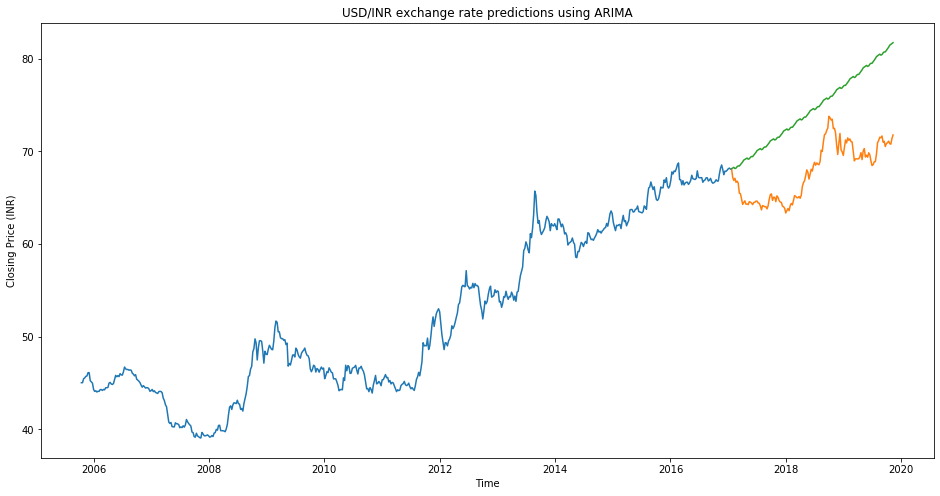

In [18]:
#plot
plt.figure(figsize=(16,8))
plt.title('USD/INR exchange rate predictions using ARIMA')
plt.ylabel('Closing Price (INR)')
plt.xlabel('Time')
plt.plot(df_train['Price'])
plt.plot(df_test['Price'])
plt.plot(forecast['Prediction'])

### fbprophet by Facebook

In [19]:
#importing prophet
from fbprophet import Prophet

In [44]:
train = df_train[['Date','Price']]
valid = df_test[['Date','Price']]

In [45]:
#preparing data
train = train.rename(columns={'Price': 'y', 'Date': 'ds'})
valid = valid.rename(columns={'Price': 'y', 'Date': 'ds'})

In [46]:
#fit the model
model = Prophet(weekly_seasonality=True, daily_seasonality=False)
model.fit(train)

In [47]:
#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

In [48]:
#rmse
forecast_valid = forecast['yhat'][len(train):]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
print('RMSE value on validation set:')
print(rms)

RMSE value on validation set:
3.0000111060092522


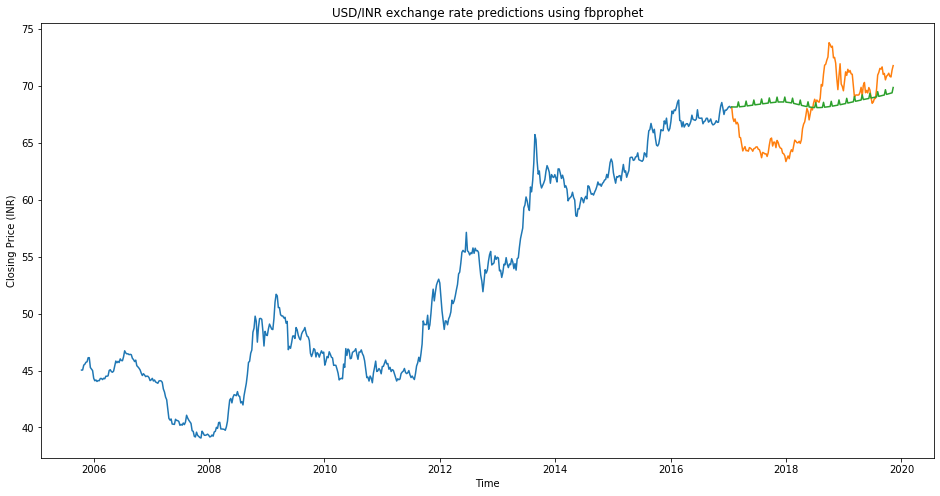

In [49]:
#plot
plt.figure(figsize=(16,8))
plt.title('USD/INR exchange rate predictions using fbprophet')
plt.ylabel('Closing Price (INR)')
plt.xlabel('Time')

valid = valid.assign(Predictions = 0)
valid = valid.assign(Predictions = forecast_valid.values)
plt.plot(train['y'])
plt.plot(valid['y'])
plt.plot(valid['Predictions'])

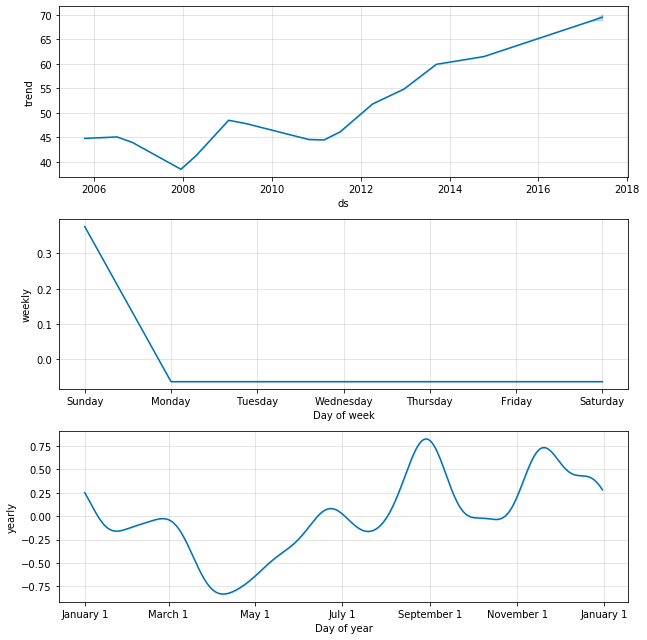

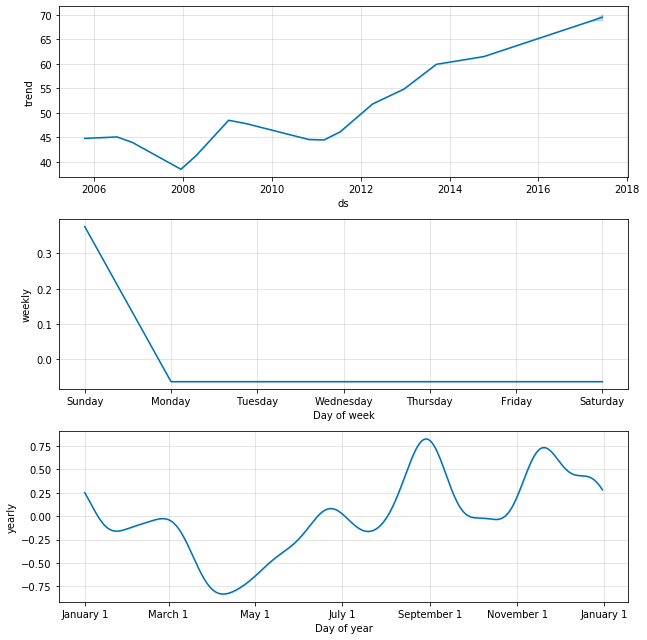

In [26]:
model.plot_components(forecast)

### Long Short Term Memory (LSTM)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

Using TensorFlow backend.


In [28]:
dataset = df[['Price']]
train = df_train[['Price']]
valid = df_test[['Price']]
dataset = dataset.values
train = train.values
valid = valid.values

In [29]:
scaled_data = scaler.fit_transform(dataset)

In [30]:
past_values = 60
x_train, y_train = [], []
for i in range(past_values, len(train)):
    x_train.append(scaled_data[i-past_values:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [31]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [32]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
 - 13s - loss: 0.0055
Epoch 2/5
 - 13s - loss: 0.0017
Epoch 3/5
 - 12s - loss: 0.0015
Epoch 4/5
 - 13s - loss: 0.0011
Epoch 5/5
 - 13s - loss: 0.0011


In [33]:
#predicting validation data values, using past_values from the train data
inputs = dataset[len(dataset) - len(valid) - past_values:]
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [34]:
X_test = []
for i in range(past_values, inputs.shape[0]):
    X_test.append(inputs[i-past_values:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [35]:
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [36]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print('RMSE value on validation set:')
print(rms)

RMSE value on validation set:
0.7873026128189251


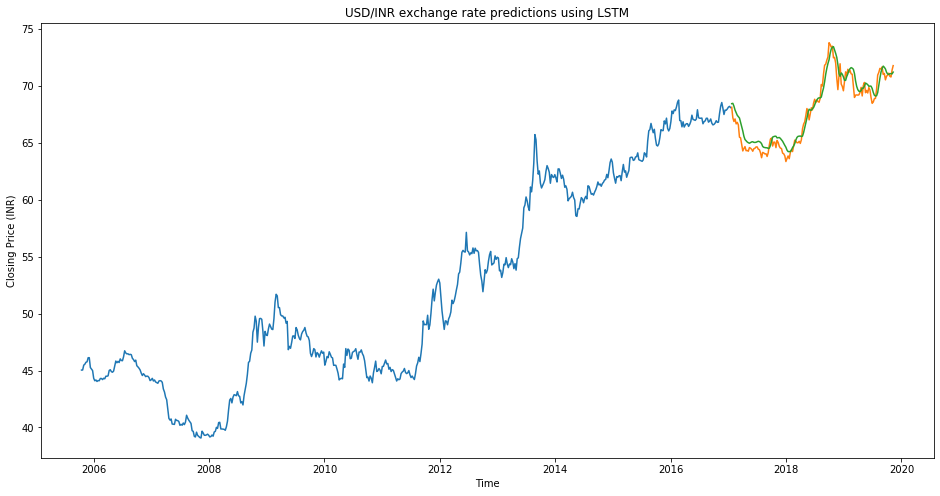

In [37]:
#plot
plt.figure(figsize=(16,8))
plt.title('USD/INR exchange rate predictions using LSTM')
plt.ylabel('Closing Price (INR)')
plt.xlabel('Time')

train = df_train[['Price']]
valid = df_test[['Price']]
valid = valid.assign(Predictions = 0)
valid = valid.assign(Predictions = closing_price)
plt.plot(train['Price'])
plt.plot(valid[['Price','Predictions']])